## Minimal notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests

import seaborn as sns

from collections import Counter
import itertools

from matplotlib.colors import LogNorm, SymLogNorm, Normalize
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/manuelmorales/miniconda3/envs/training/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import database

In [2]:
# always use False
LOCAL = False

if LOCAL:
    f = open('data/inspire_LA.json','r')
    df = json.load(f)
    f.close()
else:
    r = requests.get('https://github.com/restrepo/inspireauth/raw/main/data/inspire_LA.json')
    df = r.json()

db_master = pd.DataFrame(df)
db_master.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
0,H.Albrecht.1,Venezuela,"[{'value': 'hartwig.albrecht@desy.de', 'curren...","Albrecht, Hermann","[{'value': 'H.Albrecht.1', 'schema': 'INSPIRE ...","Unlisted, VE",912061,"{'value': 'Albrecht, Hartwig', 'preferred_name...","[{'recid': 2023395, 'year': '2021', 'citation_...",[{'record': {'$ref': 'https://inspirehep.net/a...,1018731,[],unknown,Hartwig,0.0
1,D.M.B.R.1,Venezuela,None,"Bellorin, David","[{'value': 'D.M.B.R.1', 'schema': 'INSPIRE BAI'}]","Unlisted, VE",912061,"{'value': 'R., David M. Bellorin'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023397,[],male,David Bellorin,1.0
2,D.F.Mundarain.1,Chile,None,"Mundarain, Douglas F.","[{'value': 'D.F.Mundarain.1', 'schema': 'INSPI...",Catolica del Norte U.,908143,"{'value': 'Mundarain, Douglas F.'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023398,[],male,Douglas,1.0
3,R.Gaitan.2,Venezuela,"[{'value': 'rgaitan@uc.edu.ve', 'current': Fal...","Dominguez, Yessica","[{'value': 'R.Gaitan.2', 'schema': 'INSPIRE BA...","Unlisted, VE",912061,"{'value': 'Gaitan, Rolando', 'preferred_name':...","[{'recid': 1863076, 'year': '2021', 'citation_...","[{'rank': 'PHD', 'record': {'$ref': 'https://i...",1864347,[],male,Rolando,1.0
4,J.Ntahompagaze.1,Rwanda,None,"Ntahompagaze, Joseph","[{'value': 'J.Ntahompagaze.1', 'schema': 'INSP...","EAIFR, Kigali",1636656,"{'value': 'Ntahompagaze, Joseph'}","[{'recid': 2087212, 'year': '2022', 'citation_...",None,2087213,[],male,Joseph,1.0


In [3]:
db_master[db_master['institution_id'] == "903140"]

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
30288,J.F.Nieves.1,United States,"[{'value': 'jose.nieves23@upr.edu', 'current':...","Nieves, J.F.","[{'value': '0000-0001-7408-7880', 'schema': 'O...","Puerto Rico U., Mayaguez",903140,"{'value': 'Nieves, Jose F.', 'preferred_name':...","[{'recid': 1781440, 'year': '2020', 'citation_...","[{'current': True, 'institution': 'Puerto Rico...",995645,"[{'ids': [{'value': 'INSPIRE-00186207', 'schem...",male,Jose,0.99
46041,N.Azziz.1,United States,None,"Azziz, N.",None,"Puerto Rico U., Mayaguez",903140,None,"[{'recid': 78537, 'year': '1972', 'citation_co...",None,2420685,[],unknown,,0.00


In [4]:
db_master[db_master['institution'] == "Puerto Rico U., Mayaguez"]

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
30288,J.F.Nieves.1,United States,"[{'value': 'jose.nieves23@upr.edu', 'current':...","Nieves, J.F.","[{'value': '0000-0001-7408-7880', 'schema': 'O...","Puerto Rico U., Mayaguez",903140,"{'value': 'Nieves, Jose F.', 'preferred_name':...","[{'recid': 1781440, 'year': '2020', 'citation_...","[{'current': True, 'institution': 'Puerto Rico...",995645,"[{'ids': [{'value': 'INSPIRE-00186207', 'schem...",male,Jose,0.99
46041,N.Azziz.1,United States,None,"Azziz, N.",None,"Puerto Rico U., Mayaguez",903140,None,"[{'recid': 78537, 'year': '1972', 'citation_co...",None,2420685,[],unknown,,0.00


In [5]:
db_master[db_master['institution'] == "UBI, Covilha"]

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
5293,K.Sravan.Kumar.1,Puerto Rico,"[{'value': 'sravan.k.aa@m.titech.ac.jp', 'curr...","Kumar, K.Sravan","[{'value': '0000-0002-3126-8195', 'schema': 'O...","UBI, Covilha",1296332,"{'value': 'Kumar, Korumilli Sravan', 'name_var...","[{'recid': 1357968, 'year': '2016', 'citation_...",[{'record': {'$ref': 'https://inspirehep.net/a...,1306579,"[{'ids': [{'value': 'INSPIRE-00108511', 'schem...",unknown,Korumilli Sravan,0.0
5298,J.Marto.1,Puerto Rico,None,"Marto, Joao","[{'value': '0000-0003-3974-9177', 'schema': 'O...","UBI, Covilha",1296332,"{'value': 'Marto, João', 'name_variants': ['Ma...","[{'recid': 1357968, 'year': '2016', 'citation_...",[{'record': {'$ref': 'https://inspirehep.net/a...,1275118,[],male,João,1.0
5299,P.Vargas.Moniz.1,Puerto Rico,"[{'value': 'pmoniz@ubi.pt', 'current': True}]","Vargas Moniz, P.","[{'value': '0000-0001-7170-8952', 'schema': 'O...","UBI, Covilha",1296332,"{'value': 'Vargas Moniz, Paulo', 'name_variant...","[{'recid': 2030146, 'year': '2021', 'citation_...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",997000,"[{'ids': [{'value': 'INSPIRE-00280540', 'schem...",male,Paulo,1.0
25270,J.M.Velhinho.1,Puerto Rico,"[{'value': 'jvelhi@ubi.pt', 'current': True}]","Velhinho, José M.","[{'value': '0000-0002-3219-903X', 'schema': 'O...","UBI, Covilha",1296332,"{'value': 'Velhinho, Jose Manuel', 'preferred_...","[{'recid': 762615, 'year': '2007', 'citation_c...",[{'record': {'$ref': 'https://inspirehep.net/a...,984840,"[{'name': 'Cidade Mourao, Jose Manuel', 'degre...",male,Jose Manuel,1.0
28617,I.I.Rodrigues.1,Puerto Rico,None,"Rodrigues, Ilda Inácio",None,"UBI, Covilha",1296332,None,"[{'recid': 1663560, 'year': '2018', 'citation_...",None,None,[],female,Ilda Inácio,1.0
43740,S.M.M.Rasouli.1,Puerto Rico,"[{'value': 'mrasouli@ubi.pt', 'current': True}]","Rasouli, S.M.M.","[{'value': '0000-0003-3455-1954', 'schema': 'O...","UBI, Covilha",1296332,"{'value': 'Rasouli, S.M.M.', 'preferred_name':...","[{'recid': 1482746, 'year': '2016', 'citation_...","[{'rank': 'JUNIOR', 'record': {'$ref': 'https:...",1077905,[],unknown,,0.0


# Some things to consider

- In the column `country` some rows are empty (e.g. index 832). This means that there are author instances with no country assigned. 
- All entries have an `institution_id` value, and this value is always a string.
- For a given row, the column `paper` includes potentially redundant entries. You can get rid of these with `drop_duplicates`

# All countries in the database

In [6]:
# find all countries in json
all_countries = db_master['country'].unique()
# get rid of Nonetypes in the database
all_countries = [country for country in all_countries if country is not None]
# sort countries 
all_countries.sort()

print(len(all_countries))

for country in all_countries:
    print(country)
    
# format country 
def format_country(country):
    country = country.lower()
    ans = country.replace(" ", "_")
    return ans

115
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei Darussalam
Bulgaria
Canada
Chile
China
Colombia
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Georgia
Germany
Ghana
Greece
Guatemala
Holy See (Vatican City State)
Honduras
Hungary
Iceland
India
Indonesia
Iran, Islamic Republic of
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Korea, Republic of
Kuwait
Kyrgyzstan
Latvia
Lebanon
Lithuania
Luxembourg
Madagascar
Malaysia
Malta
Mexico
Moldova
Mongolia
Montenegro
Morocco
Netherlands
New Zealand
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Palestine, State of
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Romania
Russian Federation
Rwanda
Saudi Arabia
Serbia and Montenegro
Singapore
Slovakia
Slovenia
South Africa
Spain
Sri Lanka
Sweden
Switzerland
Syrian Arab Republic
Taiwan

# Latin American countries 

In [7]:
# 19 Latin American countries indexed in the database
LA_countries = [
    'Argentina',
    'Bolivia',
    'Brazil',
    'Chile',
    'Colombia',
    'Costa Rica',
    'Cuba',
    'Dominican Republic', # new
    'Ecuador',
    'El Salvador', # new
    'Guatemala',
    'Honduras',
    'Mexico',
    'Panama', # new
    'Paraguay',
    'Peru',
    # 'Puerto Rico', # removed
    'Uruguay',
    'Venezuela'
]

# Jamaica, Bahamas not included. 

LA_countries_format = [format_country(country) for country in LA_countries]

In [8]:
db=db_master[db_master['country']=='Dominican Republic'].reset_index(drop=True)
db.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
0,Daniel.Sudarsky.1,Dominican Republic,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","Santo Domingo, PUCMM",906531,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
1,Daniel.Sudarsky.1,Dominican Republic,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, D.","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","Santo Domingo, Autonoma U.",907039,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0


# Calculate the papers

In [9]:
# get number of papers

def calculate_papers(country):
    """
    docs
    """
    # df with only the rows of the country
    db_country = db_master[db_master['country']==country].reset_index(drop=True)
    # select list of institutions of the given country
    inst_list = db_country['institution_id'].drop_duplicates().to_list()
    # define the list of dictionaries
    list_of_dicts = np.concatenate(db_country['papers'].values)
    
    # create a set to keep track of unique 'recid' values
    unique_recid_values = set()
    # create a new list to store the dictionaries with unique 'recid' values
    unique_dicts_list = []
    # create a list to store the indices of non-unique elements
    non_unique_indices = []
    # loop through the list of dictionaries and track the indices
    for index, d in enumerate(list_of_dicts):
        recid_value = d['recid']
        # check if the 'a' value is not already in the set (not a duplicate)
        if recid_value not in unique_recid_values:
            # if not, add it to the set and add the dictionary to the new list
            unique_recid_values.add(recid_value)
            unique_dicts_list.append(d)
        else:
            # if it's a duplicate, add the index to the non_unique_indices list
            non_unique_indices.append(index)
    
    # notice the typo in `instituion` in what follows
    papers_country = [element for element in unique_dicts_list if element['institution_id'] in inst_list]
    filtered_list_of_dicts = [item for item in list_of_dicts if item['institution_id'] in inst_list]
    
    seen_recids = set()
    filtered_data = []

    for item in filtered_list_of_dicts:
        if item['recid'] not in seen_recids:
            filtered_data.append(item)
            seen_recids.add(item['recid'])
    
    
    #return len(filtered_data)
    return filtered_data

In [10]:
data_rd = calculate_papers('Dominican Republic')
data_rd

[{'recid': 35032,
  'year': '1993',
  'citation_count': 51,
  'primary_arxiv_category': ['gr-qc'],
  'journal_id': 'None',
  'author_id': 'Daniel.Sudarsky.1',
  'institution_id': '906531'},
 {'recid': 373019,
  'year': '1994',
  'citation_count': 0,
  'primary_arxiv_category': [],
  'journal_id': 'None',
  'author_id': 'Daniel.Sudarsky.1',
  'institution_id': '906531'},
 {'recid': 366784,
  'year': '1993',
  'citation_count': 0,
  'primary_arxiv_category': [],
  'journal_id': 'None',
  'author_id': 'Daniel.Sudarsky.1',
  'institution_id': '907039'},
 {'recid': 369157,
  'year': 'None',
  'citation_count': 0,
  'primary_arxiv_category': [],
  'journal_id': 'None',
  'author_id': 'Daniel.Sudarsky.1',
  'institution_id': '907039'},
 {'recid': 401209,
  'year': '1995',
  'citation_count': 133,
  'primary_arxiv_category': [],
  'journal_id': '1214779',
  'author_id': 'Daniel.Sudarsky.1',
  'institution_id': '907039'}]

In [13]:
def count_shared_recids(data1, data2):
    """
    Count the number of elements with shared 'recid' values between two data structures.

    Parameters:
        data1 (list): First list of dictionaries, each containing an 'recid' key.
        data2 (list): Second list of dictionaries, each containing an 'recid' key.

    Returns:
        int: Count of shared 'recid' values.
    """
    # Extract `recid` values from each data structure
    recid_data1 = {item['recid'] for item in data1}
    recid_data2 = {item['recid'] for item in data2}

    # Find the intersection of both sets
    shared_recids = recid_data1.intersection(recid_data2)

    # Return the count of shared recids
    return len(shared_recids)

# Details on how the function above works

In [14]:
## df with only the rows of the country
#db_test = db_master[db_master['country']=='Dominican Republic'].reset_index(drop=True)
## select list of institutions of the given country
#inst_list = db_test['institution_id'].drop_duplicates().to_list()
## define the list of dictionaries
#list_of_dicts = np.concatenate(db_test['papers'].values)
    
## create a set to keep track of unique 'recid' values
#unique_recid_values = set()
## create a new list to store the dictionaries with unique 'recid' values
#unique_dicts_list = []
## create a list to store the indices of non-unique elements
#non_unique_indices = []
## loop through the list of dictionaries and track the indices
#for index, d in enumerate(list_of_dicts):
    #recid_value = d['recid']
    ## check if the 'a' value is not already in the set (not a duplicate)
    #if recid_value not in unique_recid_values:
        ## if not, add it to the set and add the dictionary to the new list
        #unique_recid_values.add(recid_value)
        #unique_dicts_list.append(d)
    #else:
        ## if it's a duplicate, add the index to the non_unique_indices list
        #non_unique_indices.append(index)
    
## notice the typo in `instituion` in what follows
#papers_country_test = [element for element in unique_dicts_list if element['instituion_id'] in inst_list]

In [15]:
for country in LA_countries:
    print(f'{country} papers: {len(calculate_papers(country))}')

Argentina papers: 5958
Bolivia papers: 42
Brazil papers: 24962
Chile papers: 6396
Colombia papers: 1582
Costa Rica papers: 215
Cuba papers: 393
Dominican Republic papers: 5
Ecuador papers: 117
El Salvador papers: 6
Guatemala papers: 32
Honduras papers: 13
Mexico papers: 10398
Panama papers: 3
Paraguay papers: 5
Peru papers: 185
Uruguay papers: 441
Venezuela papers: 1047


In [16]:
def calculate_number_papers_all():
    ans = {}
    for country in LA_countries:
        ans[country] = len(calculate_papers(country))
    return ans

papers = calculate_number_papers_all();

# Generate the histogram

In [17]:
# Population of each country

"""
Arrays account for 
- Argentina
- Bolivia
- Brazil
- Chile
- Colombia
- Costa Rica
- Cuba
- Dominican Republic
- Ecuador
- El Salvador
- Guatemala
- Honduras
- Mexico
- Panama
- Paraguay
- Peru
- Puerto Rico
- Uruguay
- Venezuela
"""

# population in millions of inhabitants
population = {element: None for element in LA_countries}

population['Argentina'] = 45.606
population['Bolivia'] = 11.833
population['Brazil'] = 213.993
population['Chile'] = 19.212
population['Colombia'] = 51.266
population['Costa Rica'] = 5.139
population['Cuba'] = 11.318
population['Dominican Republic'] = 10.954
population['Ecuador'] = 17.888
population['El Salvador'] = 6.158
population['Guatemala'] = 18.250
population['Honduras'] = 10.063
population['Mexico'] = 130.262
population['Panama'] = 4.382
population['Paraguay'] = 7.220
population['Peru'] = 33.359
#population['Puerto Rico'] = 2.828 # removed
population['Uruguay'] = 3.485
population['Venezuela'] = 28.705


# number of authors per country 
# taken from our own results
n_auth = {element: None for element in LA_countries}

n_auth['Argentina'] = 1985
n_auth['Bolivia'] = 50
n_auth['Brazil'] = 8456
n_auth['Chile'] = 2044
n_auth['Colombia'] = 723
n_auth['Costa Rica'] = 29
n_auth['Cuba'] = 236
n_auth['Dominican Republic'] = 1
n_auth['Ecuador'] = 66
n_auth['El Salvador'] = 6
n_auth['Guatemala'] = 32
n_auth['Honduras'] = 11
n_auth['Mexico'] = 3876
n_auth['Panama'] = 3
n_auth['Paraguay'] = 5
n_auth['Peru'] = 156
#n_auth['Puerto Rico'] = 10 # removed
n_auth['Uruguay'] = 87
n_auth['Venezuela'] = 370


In [18]:
papers_pc = {k: papers[k] / population[k] for k in papers}

In [19]:
papers_pc

{'Argentina': 130.6407051703723,
 'Bolivia': 3.5493957576269755,
 'Brazil': 116.64867542396247,
 'Chile': 332.9169269206746,
 'Colombia': 30.85865876019194,
 'Costa Rica': 41.83693325549718,
 'Cuba': 34.72344937268069,
 'Dominican Republic': 0.456454263282819,
 'Ecuador': 6.540697674418604,
 'El Salvador': 0.974342318934719,
 'Guatemala': 1.7534246575342465,
 'Honduras': 1.2918612739739639,
 'Mexico': 79.8237398473845,
 'Panama': 0.6846188954815153,
 'Paraguay': 0.6925207756232687,
 'Peru': 5.545729788063191,
 'Uruguay': 126.54232424677188,
 'Venezuela': 36.47448179759624}

Now, instead of getting the papers per capita, we are going to get the papers per author

In [20]:
papers_per_author = {k: papers[k] / n_auth[k] for k in papers}

In [21]:
papers_per_author

{'Argentina': 3.0015113350125944,
 'Bolivia': 0.84,
 'Brazil': 2.9519867549668874,
 'Chile': 3.1291585127201564,
 'Colombia': 2.1881051175656987,
 'Costa Rica': 7.413793103448276,
 'Cuba': 1.6652542372881356,
 'Dominican Republic': 5.0,
 'Ecuador': 1.7727272727272727,
 'El Salvador': 1.0,
 'Guatemala': 1.0,
 'Honduras': 1.1818181818181819,
 'Mexico': 2.6826625386996903,
 'Panama': 1.0,
 'Paraguay': 1.0,
 'Peru': 1.185897435897436,
 'Uruguay': 5.068965517241379,
 'Venezuela': 2.82972972972973}

# Generate histogram of papers per capita

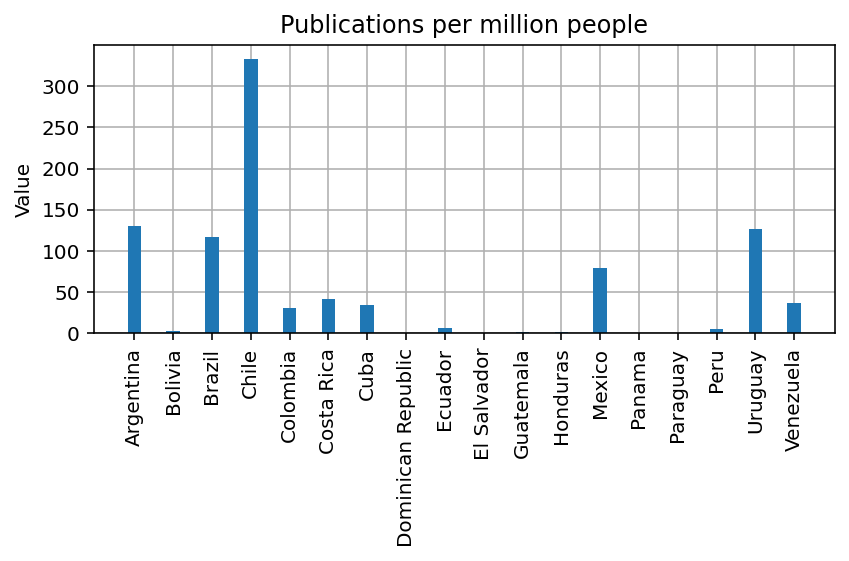

In [22]:
def gen_papers_pc():

    labels = LA_countries
    data = papers_pc.values()

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(x, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.grid(True)
    ax.set_ylabel('Value')
    ax.set_title('Publications per million people')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_axisbelow(True)

    fig.tight_layout()
    fig.savefig(f'../figures/papers/all_publications_pc.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()
    
gen_papers_pc()

# Generate histogram of papers per author

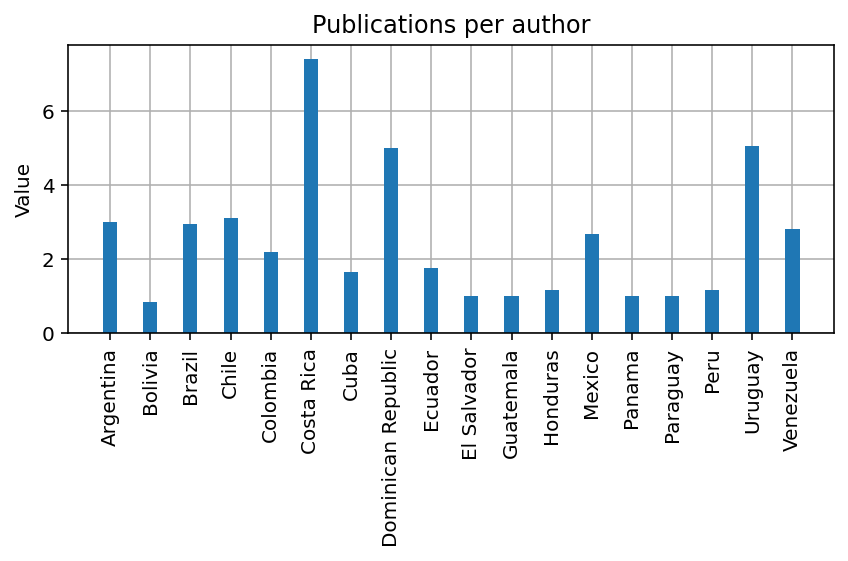

In [23]:
def gen_papers_per_author():
    
    # without the anomaly in DR
    labels = np.array(LA_countries)
    data = np.array(list(papers_per_author.values()))
    
    new_labels = np.delete(np.copy(labels), 7)
    new_data = np.delete(np.copy(data), 7)
        
    x = np.arange(len(labels))  # the label locations
    #x = np.arange(len(new_labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(x, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.grid(True)
    ax.set_ylabel('Value')
    ax.set_title('Publications per author')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.set_xticklabels(new_labels)
    ax.set_axisbelow(True)

    fig.tight_layout()
    fig.savefig(f'../figures/papers/all_publications_per_author.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()
    
gen_papers_per_author()

# Correlation with GDP

In [64]:
# GDP in R&D of each country

"""
Arrays account for 
- Argentina
- Bolivia
- Brazil
- Chile
- Colombia
- Costa Rica
- Cuba
- Dominican Republic
- Ecuador
- El Salvador
- Guatemala
- Honduras
- Mexico
- Panama
- Paraguay
- Peru
- Puerto Rico # removed
- Uruguay
- Venezuela
"""

## GDPs taken from the World Bank
#gdp = {element: None for element in LA_countries}

#gdp['Argentina'] = 0.46
#gdp['Bolivia'] = 0.16
#gdp['Brazil'] = 1.21
#gdp['Chile'] = 0.34
#gdp['Colombia'] = 0.29
#gdp['Costa Rica'] = 0.37
#gdp['Cuba'] = 0.52
#gdp['Dominican Republic'] = None # no info from the World Bank
#gdp['Ecuador'] = 0.44
#gdp['El Salvador'] = 0.17
#gdp['Guatemala'] = 0.03
#gdp['Honduras'] = 0.04
#gdp['Mexico'] = 0.3
#gdp['Panama'] = 0.15
#gdp['Paraguay'] = 0.14
#gdp['Peru'] = 0.17
##gdp['Puerto Rico'] = 0.43
#gdp['Uruguay'] = 0.48
#gdp['Venezuela'] = 0.34

# GDPs taken from the World Bank
gdp = {element: None for element in LA_countries}

gdp['Argentina'] = 0.49
gdp['Bolivia'] = 0.28
gdp['Brazil'] = 1.12
gdp['Chile'] = 0.35
gdp['Colombia'] = 0.22
gdp['Costa Rica'] = 0.40
gdp['Cuba'] = 0.47
gdp['Dominican Republic'] = None # no info from the World Bank
gdp['Ecuador'] = 0.20
gdp['El Salvador'] = 0.11
gdp['Guatemala'] = 0.04
gdp['Honduras'] = 0.04
gdp['Mexico'] = 0.36
gdp['Panama'] = 0.2
gdp['Paraguay'] = 0.09
gdp['Peru'] = 0.11
#gdp['Puerto Rico'] = 0.43
gdp['Uruguay'] = 0.34
gdp['Venezuela'] = 0.29

# Formatting parameters of the plot


In [65]:
colour_list = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
               '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', #fabebe es el color de el Salvador
               #'#008080', '#e6beff', '#9a6324', '#800000', #e6beff es el color de Honduras
               '#008080', '#000000', '#9a6324', '#800000', 
               '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

# Without linear regression
#def gen_publications_sp():
    
    #fig, ax = plt.subplots()

    #data = list(zip(LA_countries, 
                    #gdp.values(), 
                    #papers_pc.values(), 
                    #population.values()))
    
    #for i in range(len(data)):
        ## take care of the exceptions
        #if data[i][1] is not None:
            #x = data[i][1]
            #y = data[i][2]
            #r = data[i][3]  #radius
            ##ax.scatter(x, y, label=data[i][0], s=10*r, alpha=0.8, c=colour_list[i], edgecolors='none')
            #ax.scatter(x, y, label=data[i][0], s=200, alpha=0.7, c=colour_list[i], edgecolors='none')
    
    ## format
    #ax.set_xlabel('Percent of GDP')
    #ax.set_ylabel('Publications per million inhabitants')

    #ax.grid(True)
    #ax.set_axisbelow(True)
    #lgnd = ax.legend()
    #handles = lgnd.legendHandles

    #for handle in handles:
        #handle._sizes = [50]

    ## Specify the legend location outside the plot
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ##fig.savefig(f'../figures/papers/all_publications_sp.pdf', 
    ##            dpi=150, bbox_inches = 'tight')

    #plt.show()
    
#gen_publications_sp()

In [66]:
#shape_list = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', '+', 'X', 'd', '|', '_', 'P']

#def gen_publications_sp():
    #fig, ax = plt.subplots(figsize=(8, 5))

    #data = list(zip(LA_countries, gdp.values(), papers_pc.values(), population.values()))
    
    #for i in range(len(data)):
        #if data[i][1] is not None:
            #x = data[i][1]
            #y = data[i][2]
            #r = data[i][3]  # radius
            #ax.scatter(x, y, label=data[i][0], s=200, alpha=0.8, marker=shape_list[i], edgecolors='none')
    
    #ax.set_xlabel('Percent of GDP')
    #ax.set_ylabel('Publications per million inhabitants')
    #ax.grid(True)
    #ax.set_axisbelow(True)
    
    ## Specify the legend location outside the plot
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})

    #fig.savefig(f'../figures/papers/test.pdf', dpi=150, bbox_inches = 'tight')
    
    #plt.show()
    
#gen_publications_sp()

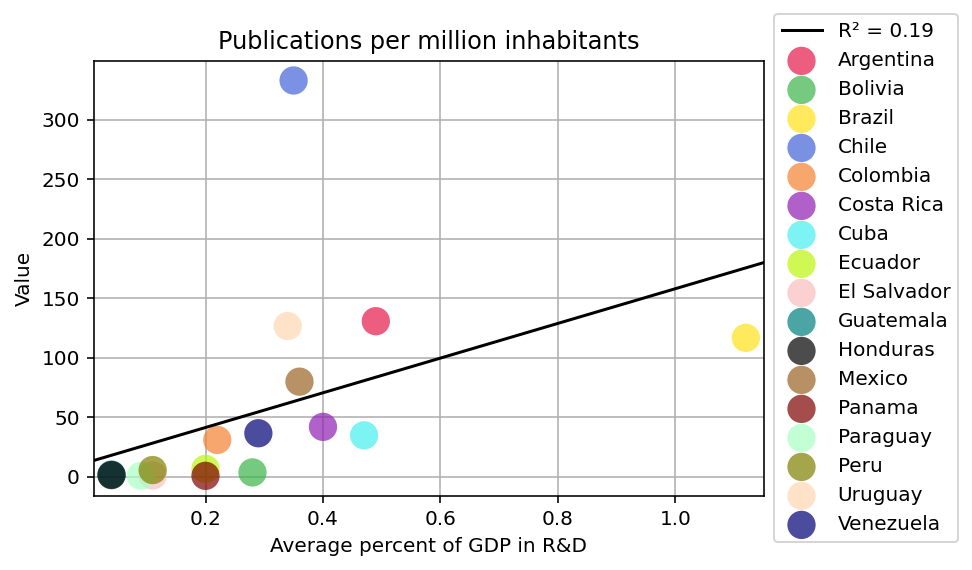

In [68]:
# Include linear regression
from scipy.stats import linregress
from sklearn.metrics import r2_score

def gen_publications_sp():
    
    fig, ax = plt.subplots()

    data = list(zip(LA_countries, 
                    gdp.values(), 
                    papers_pc.values(), 
                    population.values()))
    
    # Extract x (Percent of GDP) and y (Publications per million inhabitants) values
    x_values = []
    y_values = []
    
    for i in range(len(data)):
        # Handle missing data
        if data[i][1] is not None and data[i][2] is not None:
            x = data[i][1]  # GDP percentage
            y = data[i][2]  # Publications per million
            r = data[i][3]  # Radius (population)
            x_values.append(x)
            y_values.append(y)
            ax.scatter(x, y, label=data[i][0], s=200, alpha=0.7, c=colour_list[i], edgecolors='none')

    # Ensure x_values and y_values are not empty before regression
    if not x_values or not y_values:
        print("Error: No valid data points for regression.")
        return

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Generate extended x values
    x_min = min(x_values)
    x_max = max(x_values)
    x_range = np.linspace(x_min - 0.03, x_max + 0.03, 100)
    
    regression_line = slope * x_range + intercept

    # Filter to keep only points where y >= 0
    valid_indices = regression_line >= 0
    x_filtered = x_range[valid_indices]
    y_filtered = regression_line[valid_indices]

    # Calculate R-squared value
    r_squared = r2_score(y_values, slope * np.array(x_values) + intercept)
    
    # Plot the regression line (only valid range)
    ax.plot(x_filtered, y_filtered, color="black", linestyle="-", label=f'R² = {r_squared:.2f}')
    
    # Format
    ax.set_xlabel('Average percent of GDP in R&D')
    ax.set_ylabel('Value')
    ax.set_title('Publications per million inhabitants')

    ax.set_xlim(x_min - 0.03, x_max + 0.03)  # Adjust x-limits safely

    ax.grid(True)
    ax.set_axisbelow(True)
    
    # Specify the legend location outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    fig.savefig(f'../figures/papers/all_publications_sp_avg.pdf', 
                dpi=150, bbox_inches='tight')

    plt.show()
    
gen_publications_sp()


# HDI metrics

In [57]:
# HDI taken from the World Bank
hdi = {element: None for element in LA_countries}
hdi['Argentina'] = 0.801625
hdi['Bolivia'] = 0.6403125
hdi['Brazil'] = 0.69778125
hdi['Chile'] = 0.79
hdi['Colombia'] = 0.70140625
hdi['Costa Rica'] = 0.7419375
hdi['Cuba'] = 0.728125
hdi['Dominican Republic'] = 0.67878125
hdi['Ecuador'] = 0.71125
hdi['El Salvador'] = 0.622875
hdi['Guatemala'] = 0.5763125
hdi['Honduras'] = 0.5724375
hdi['Mexico'] = 0.727875
hdi['Panama'] = 0.75053125
hdi['Paraguay'] = 0.6809375
hdi['Peru'] = 0.69909375
hdi['Uruguay'] = 0.768125
hdi['Venezuela'] = 0.7186875


In [58]:
# Does not include linear regression
#def gen_publications_sp_hdi():
    
    #fig, ax = plt.subplots()

    #data = list(zip(LA_countries, 
                    #hdi.values(), 
                    #papers_pc.values(), 
                    #population.values()))
    
    #for i in range(len(data)):
        ## take care of the exceptions
        #if data[i][1] is not None:
            #x = data[i][1]
            #y = data[i][2]
            #r = data[i][3]  #radius
            ##ax.scatter(x, y, label=data[i][0], s=10*r, alpha=0.8, c=colour_list[i], edgecolors='none')
            #ax.scatter(x, y, label=data[i][0], s=200, alpha=0.8, c=colour_list[i], edgecolors='none')
    
    ## format
    #ax.set_xlabel('HDI')
    #ax.set_ylabel('Publications per million inhabitants')
    #ax.set_xlim(0.95 * np.min(list(hdi.values())), 1.05 * np.max(list(hdi.values())))
    ##ax.set_ylim(0.95 * np.min(list(papers_pc.values())), 1.05 * np.max(list(papers_pc.values())))

    #ax.grid(True)
    #ax.set_axisbelow(True)
    #lgnd = ax.legend()
    #handles = lgnd.legendHandles

    #for handle in handles:
        #handle._sizes = [50]

    ## Specify the legend location outside the plot
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ##fig.savefig(f'../figures/papers/all_publications_sp.pdf', 
    ##            dpi=150, bbox_inches = 'tight')

    #plt.show()
    
#gen_publications_sp_hdi()

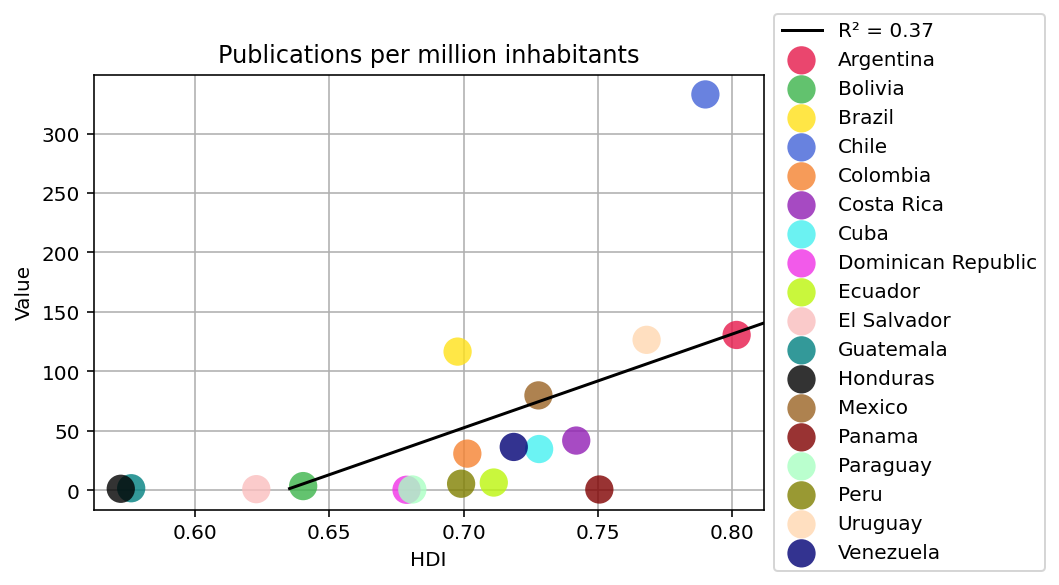

In [59]:
# With linear regression
def gen_publications_sp_hdi():
    
    fig, ax = plt.subplots()

    data = list(zip(LA_countries, 
                    hdi.values(), 
                    papers_pc.values(), 
                    population.values()))
    
    # Extract x (HDI) and y (Publications per million inhabitants) values
    x_values = []
    y_values = []
    
    for i in range(len(data)):
        # Handle missing data
        if data[i][1] is not None:
            x = data[i][1]
            y = data[i][2]
            x_values.append(x)
            y_values.append(y)
            ax.scatter(x, y, label=data[i][0], s=200, alpha=0.8, c=colour_list[i], edgecolors='none')
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Generate extended x values
    x_range = np.linspace(min(x_values), max(x_values) + 0.01, 100)
    regression_line = slope * x_range + intercept

    # Filter to keep only points where y >= 0
    valid_indices = regression_line >= 0
    x_filtered = x_range[valid_indices]
    y_filtered = regression_line[valid_indices]

    # Calculate R-squared value
    r_squared = r2_score(y_values, slope * np.array(x_values) + intercept)
    
    # Plot the regression line (only valid range)
    ax.plot(x_filtered, y_filtered, color="black", linestyle="-", label=f'R² = {r_squared:.2f}')
    
    # Format
    ax.set_xlabel('HDI')
    ax.set_ylabel('Value')
    ax.set_title('Publications per million inhabitants')
    ax.set_xlim(np.min(list(hdi.values())) - 0.01, np.max(list(hdi.values())) + 0.01)

    ax.grid(True)
    ax.set_axisbelow(True)
    
    # Specify the legend location outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    fig.savefig(f'../figures/papers/all_publications_sp_hdi.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()
    
gen_publications_sp_hdi()
